In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam' ,
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(x_train, y_train, epochs = 3)

11501568/11490434 [==============================] - 7s 1us/step
Epoch 1/3
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2674 - accuracy: 0.9220
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9766


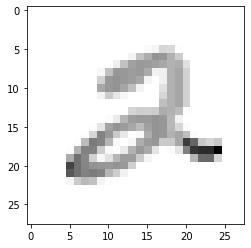

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap = plt.cm.binary)

In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9718
0.08829162269830704 0.9718000292778015


In [4]:
model.save('my_digit_model.model')

INFO:tensorflow:Assets written to: my_digit_model.model\assets


In [6]:
new_model = tf.keras.models.load_model('my_digit_model.model')

In [7]:
pred = new_model.predict([x_test])

In [8]:
import numpy as np

print(pred[0])

print(np.argmax(pred[0]))

[3.4198216e-10 7.3724586e-08 8.7905221e-07 6.2799163e-06 1.0962915e-10
 6.6470901e-10 8.6167976e-15 9.9999261e-01 5.2326288e-10 9.8613569e-08]
7


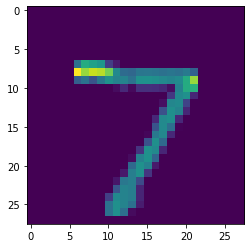

In [9]:
plt.imshow(x_test[0])


[9.9997675e-01 6.9959876e-19 1.3693084e-06 1.0337315e-06 1.8455204e-24
 6.1729061e-10 2.0846303e-05 3.8908424e-10 2.1049720e-08 5.1975991e-15]
0


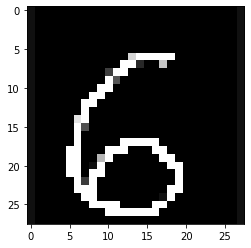

In [118]:
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model






img = load_img('6.png', grayscale=True, target_size=(28, 28))
img = img_to_array(img)
img = img.reshape(1,28,28)
img = img.astype('float32')
img = img / 255.0




plt.imshow(img[0],cmap = plt.cm.binary)

pred = new_model.predict([img])

print(pred[0])

print(np.argmax(pred[0]))